In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json

In [2]:
f_0 = open('StreamingHistory0.json', encoding='utf8') 
data_0 = json.load(f_0) 

f_1 = open('StreamingHistory1.json', encoding='utf8') 
data_1 = json.load(f_1) 

f_2 = open('StreamingHistory2.json', encoding='utf8') 
data_2 = json.load(f_2) 

f_3 = open('StreamingHistory3.json', encoding='utf8') 
data_3 = json.load(f_3) 

f_4 = open('StreamingHistory4.json', encoding='utf8') 
data_4 = json.load(f_4) 

In [3]:
data= data_0 + data_1 + data_2 + data_3 + data_4

In [4]:
df = pd.DataFrame(data)
#Make edits to the dataframe
df=df.rename(columns={"artistName": "Artist", "trackName": "Track","endTime":"DateTime","msPlayed":"Minutes"}) #Change column names
df['DateTime'] = pd.to_datetime(df['DateTime']) #Change to a datetime object
df['Minutes']=df['Minutes'].divide(60000) #Convert msPlayed to minutes

# Most Played Artists and Tracks

In [5]:
df.groupby(by=['Artist']).Track.count().sort_values(ascending=False)[:20]

Artist
Guided By Voices             2619
Alex G                       2234
Silver Jews                   949
Yo La Tengo                   841
Modest Mouse                  812
Big Thief                     761
The Microphones               683
Boards of Canada              592
Duster                        592
The Beatles                   577
CAN                           518
The Kinks                     493
King Krule                    424
Wire                          414
Sun Kil Moon                  372
The Olivia Tremor Control     372
Joy Division                  359
Fiona Apple                   353
Red House Painters            352
Aphex Twin                    333
Name: Track, dtype: int64

In [6]:
df.groupby(by=['Artist','Track']).Track.count().sort_values(ascending=False)[:20]

Artist                     Track                                         
The Olivia Tremor Control  Green Typewriters                                 125
Alex G                     Bug                                                97
Guided By Voices           The Goldheart Mountaintop Queen Directory          91
                           Dusted                                             90
                           Peep-Hole                                          81
Alex G                     Thorns                                             81
Silver Jews                How to Rent a Room                                 80
Cocteau Twins              Heaven Or Las Vegas                                71
Guided By Voices           Buzzards And Dreadful Crows                        68
Alex G                     Kicker                                             63
King Krule                 Alone, Omen 3                                      63
The Kinks                  Do You R

This shows my most listened to tracks and artists over the past year by the number of times I have played a song. However, this may be skewed by the length of song. For example, Guided by Voices tracks are often very short and less than 2 minutes. So if I spend an hour listening to Guided By Voices I may listen to 30 tracks. Compare this to an artist who has an average song length of 10 minutes, I'd only listen to 6 tracks. It's also possible that when I played a track I only listened to the first 10 seconds or so before skipping. In this case I didn't really listen to the track but it would still count towards the totals. It would be interesting to see how my top artists and tracks are affected by sorting by minutes played rather than total count

In [34]:
df.groupby(by='Artist')['Minutes'].sum().sort_values(ascending=False)[:20]

Artist
Alex G                5622.680650
Guided By Voices      4279.063017
Yo La Tengo           3285.637850
Silver Jews           3239.776900
Modest Mouse          3021.974317
Big Thief             2469.156183
CAN                   2366.425083
Duster                1845.416183
The Microphones       1839.168300
Sun Kil Moon          1827.458417
Boards of Canada      1820.263367
Red House Painters    1707.594033
Alzabo Soup           1464.248133
Songs: Ohia           1398.659133
The Beatles           1354.656783
Fiona Apple           1259.945117
Joy Division          1257.969167
Hamish & Andy         1209.594400
Swans                 1154.410067
Aphex Twin            1153.568533
Name: Minutes, dtype: float64

In [35]:
df.groupby(by=['Artist','Track'])['Minutes'].sum().sort_values(ascending=False)[:20]

Artist          Track                         
Sun Kil Moon    Duk Koo Kim                       356.386167
Yo La Tengo     Blue Line Swinger                 329.891600
Cocteau Twins   Heaven Or Las Vegas               316.012150
Modest Mouse    Edit the Sad Parts                304.236883
Big Thief       Not                               299.045750
Yo La Tengo     We're An American Band            289.137283
Alex G          Snot                              273.566383
Drop Nineteens  Kick The Tragedy                  267.527917
Songs: Ohia     Farewell Transmission             265.763867
Jerkcurb        Shadowshow                        256.225033
Duster          Cooking                           254.559450
Alex G          Bug                               249.266083
CAN             Mother Sky                        243.821733
Alex G          Salt                              239.944317
Mercury Rev     Frittering                        226.793433
Enablers        Look                  

This has made a difference. Guided By Voices is no longer my most played artist and Swans has appeared in the top 20. Two podcasts have also entered the top 20. The top tracks has changed the most, however. With a lot of the longer tracks that missed out, like Duk Koo Kim and Mother Sky, featuring. Neither of these are necessarily a better representation as longer tracks are favoured when using minutes played and shorter tracks are favoured when using the total count. However, I would say the minutes played representations represents my favourite tracks I've been listening to this year better, although it is missing all the Guided By Voices songs.

# Daily Listening History

Next I will look at the minutes played on each day over the past year

In [5]:
#Convert DateTime to two separate columns to help with analysis
df['Date']=df['DateTime'].apply(lambda x: x.date())
df['Time']=df['DateTime'].apply(lambda x: x.time())
df.drop('DateTime', axis=1, inplace=True)

In [6]:
df

,Artist,Track,Minutes,Date,Time
0,Big Thief,Magic Dealer,3.030000,2019-10-02,23:55:00
1,Kurt Vile,Baby’s Arms,3.938433,2019-10-03,20:16:00
2,The Modern Lovers,Roadrunner,4.107333,2019-10-03,20:20:00
3,EARTHGANG,Bank,2.991550,2019-10-03,20:23:00
4,Danny Brown,3 Tearz,2.328217,2019-10-03,20:25:00
...,...,...,...,...,...
41107,The Rolling Stones,Sweet Virginia,0.021683,2020-10-03,14:54:00
41108,Bob Dylan,I Want You,0.052267,2020-10-03,15:10:00
41109,Alex G,In My Arms,2.428433,2020-10-03,15:10:00
41110,Laura Marling,Held Down,4.132000,2020-10-03,15:15:00


In [6]:
daily_minutes=df.groupby(by='Date')['Minutes'].sum()


Text(0.5, 1.0, 'Daily Minutes Played Over the Past Year of My Listening History')

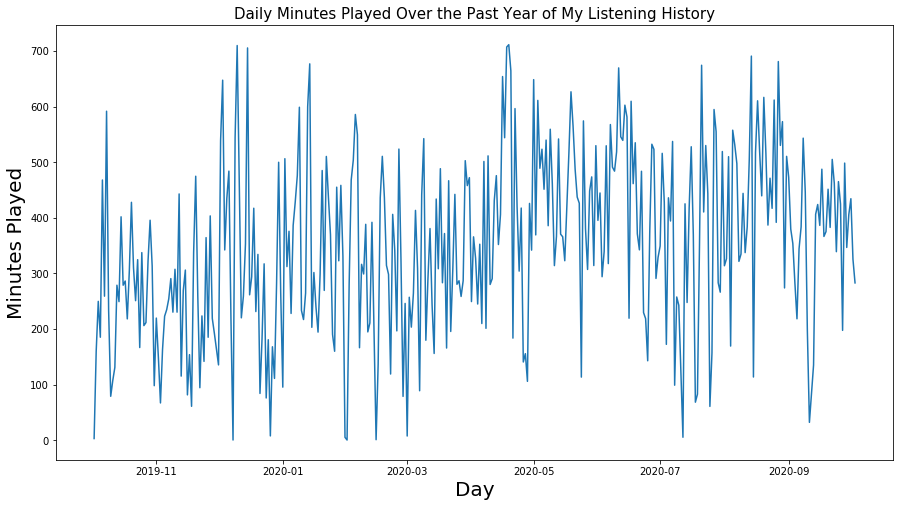

In [8]:
plt.figure(figsize=(15,8))
plt.plot(daily_minutes)
plt.xlabel("Day",fontsize=20)
plt.ylabel("Minutes Played",fontsize=20)
plt.title("Daily Minutes Played Over the Past Year of My Listening History",fontsize=15)

In [9]:
print("Total hours listened:",df['Minutes'].sum()/60)
print("Average hours listened per day:",(df['Minutes'].sum()/60)/(df['Date'].max() - df['Date'].min()).days)
print("Maximum hours listened in a day:", max(daily_minutes)/60)
print("Minimum hours listened in a day:", min(daily_minutes)/60)

Total hours listened: 2141.643441944444
Average hours listened per day: 5.835540713745079
Maximum hours listened in a day: 11.860913333333334
Minimum hours listened in a day: 0.005884444444444444


The results from my analysis show how the daily listening length has varied day to day, as well as some stats such as minimum and maximum. In total over the past year I have listened to ~2142 hours of music with the maximum in one day being almost 12 hours, which is quite a lot of music. Probably the most surprising find for me, however, is that the minimum for one day is not 0. So, there was not a single day in the past year I didn't not use Spotify, even if that was only for ~21 seconds. In the plot above the daily variations can be quite large and, therefore, obscure longer term trends. I believe the amount of music I listen to has increased since the start of the pandemic and so I want to see the longer term trends. Therefore, I will next plot a moving average of this data.

In [10]:
window_size = 7 #48 Samples is a day
i = window_size
moving_average = []
#Calculate moving average
while i <= len(daily_minutes):
    window = daily_minutes[i - window_size : i ]
    window_average = sum(window) / window_size
    moving_average.append(window_average)
    i += 1

window_plot=daily_minutes.index[window_size-1:] #For plotting the moving average

Text(0.5, 1.0, '7 Day Moving Average')

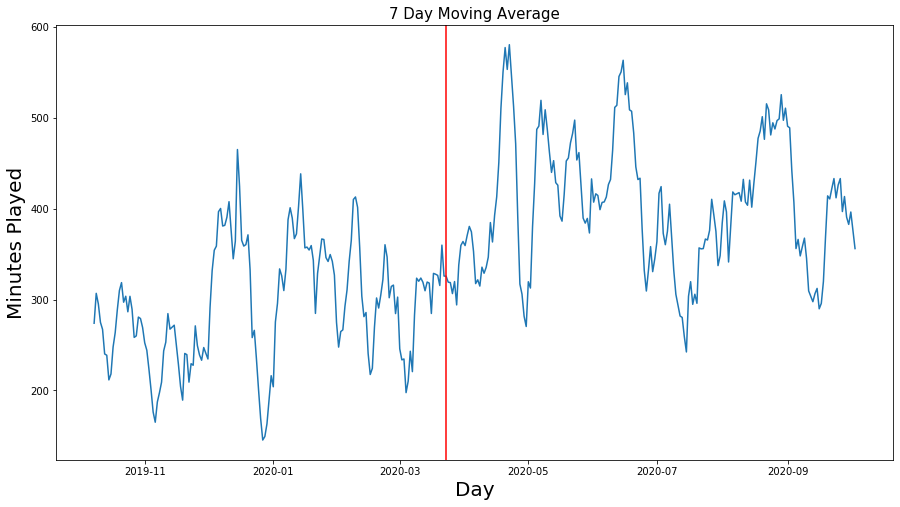

In [11]:
plt.figure(figsize=(15,8))
plt.plot(window_plot,moving_average)
plt.axvline(x=datetime.datetime(2020, 3, 23),c="r",alpha=1)
plt.xlabel("Day",fontsize=20)
plt.ylabel("Minutes Played",fontsize=20)
plt.title("7 Day Moving Average",fontsize=15)

From first visual inspection it seems my belief was correct and my daily listening time has increased since the lockdown and pandemic started. Fullfact.org defines the start of UK Lockdown as 23rd March, this date is marked on the moving average plot with a vertical red line. However, more is needed to back this up than just a visual inspection

In [12]:
from sklearn.linear_model import LinearRegression
X=np.array([i for i,x in enumerate(window_plot)]).reshape(-1,1)
clf= LinearRegression()
clf.fit(X, moving_average)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.3314584746449195


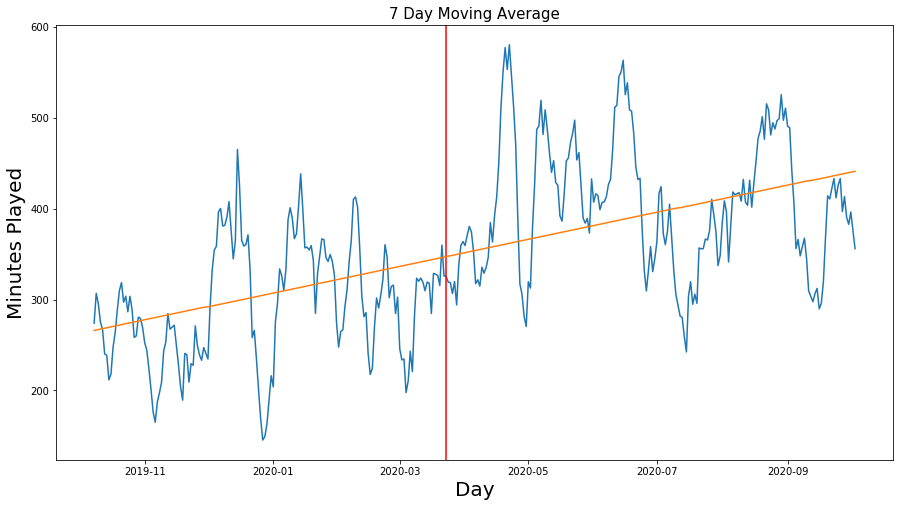

In [16]:
plt.figure(figsize=(15,8))
plt.plot(window_plot,moving_average)
plt.axvline(x=datetime.datetime(2020, 3, 23),c="r",alpha=1)
plt.xlabel("Day",fontsize=20)
plt.ylabel("Minutes Played",fontsize=20)
plt.title("7 Day Moving Average",fontsize=15)
plt.plot(window_plot,clf.predict(X))
print(clf.score(X,moving_average))

The above plot shows a linear regression fit for the moving average data. This linear regression model predicts an overall increase in minutes played as the year goes on, supporting my hypothesis. However, this is an extremely simple model and the relationship between the two variables obviously isn't linear. Next I will test a polynomial regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
clf_2 = LinearRegression()
clf_2.fit(X_poly, moving_average)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.3797146836159804


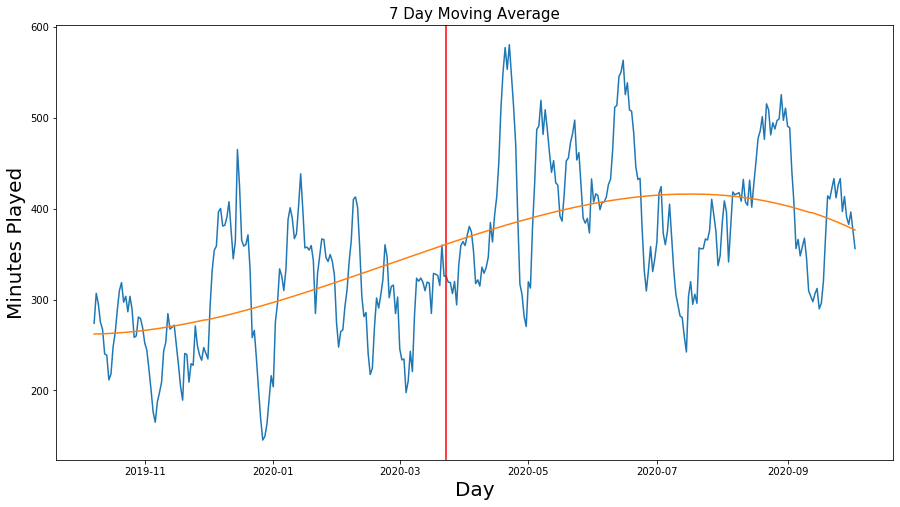

In [18]:
plt.figure(figsize=(15,8))
plt.plot(window_plot,moving_average)
plt.axvline(x=datetime.datetime(2020, 3, 23),c="r",alpha=1)
plt.xlabel("Day",fontsize=20)
plt.ylabel("Minutes Played",fontsize=20)
plt.title("7 Day Moving Average",fontsize=15)
plt.plot(window_plot,clf_2.predict(X_poly))
print(clf_2.score(X_poly,moving_average))

The polynomial regression with degree 3 shows a similar result to the linear regression. There is an overall increase in the daily minutes played since the lockdown started, with the highest values around May to August. However, there is also a slight decrease towards the end of the time period in September/October. This coincides with me finishing my master's degree and makes sense since I almost always listen to music while coding/revising/writing so when I had more time to do other things my listening time slightly decreased. This brings up the question of whether the increase is necessarily to do with lockdown or could be to do with my exams and master's research project as these two periods coincide almost perfectly. I believe it is most likely a combination of the two, as daily listening times have still stayed high since I finished my degree but having the amount of work that I did definitely caused a further increase. Without the pandemic/lockdown I would've spent more time socializing or just being outside the house in general and, therefore, would've listened to music on Spotify less.

In [23]:
pre_pandemic = df[df.Date < datetime.date(2020, 3, 23)]
pandemic=df[df.Date >= datetime.date(2020, 3, 23)]
pre_pan_minutes=pre_pandemic.groupby(by='Date')['Minutes'].sum()
pan_minutes=pandemic.groupby(by='Date')['Minutes'].sum()

Text(0, 0.5, 'Daily Minutes Played')

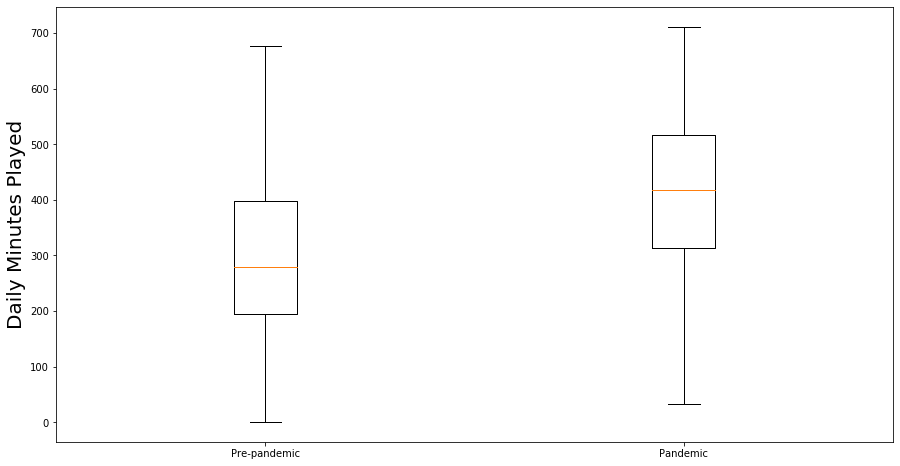

In [38]:
plt.figure(figsize=(15,8))
plt.boxplot([pre_pan_minutes,pan_minutes],showfliers=False,labels=["Pre-pandemic","Pandemic"])
plt.ylabel("Daily Minutes Played",fontsize=20)

These box plots of the distribution of the data before and after 23rd March 2020 further prove my hypothesis. Although the range of the two distributions is similar, the upper quartile, lower quartile and median are all significantly higher during the pandemic. Proving that my music consumption has increased after lockdown began

# Audio Properties

Next I want to see if the audio properties of the music I've listened to has changed over time. I will look at this on a weekly basis and look at the properties of danceability, valence and acousticness. A couple if issues had to be addressed in the code. The first was the SpotifyAPI not recognizing track/artist names if they have an apostrophe in them, so they were removed. The second was that sometimes the song had changed name on spotify or the song had been removed from spotify. These instances were ignored from the dataset as there were only 186 of these samples. The code for getting the the track uris and the audio features can take a while to run as there are 41112 songs in this dataset and the code has to query each track individually. Therefore, it's recommended to save the outputs as files that can be reused for later analysis

In [13]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
sp_client_id = "" #Spotify Client ID
sp_client_secret = '' #Spotify CLient Secret
client_credentials_manager = SpotifyClientCredentials(sp_client_id, sp_client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager )

In [16]:
uris_all=df.apply(lambda row:row.Track.replace("'","")+" artist:"+ row.Artist.replace("'",""), axis=1)\
            .apply(lambda x:spotify.search(q=x , type='track',market="GB")["tracks"]["items"])\
            .apply(lambda x: x[0]["uri"] if len(x)!=0 else np.nan)
#uris_all.to_csv('uris.csv',index=False)

In [17]:
uris_all=pd.read_csv('uris.csv',names=["uri"])
#Remove tracks for which I couldn't find a Spotify URI
df.loc[:,"uri"]=uris_all
new_df=df.dropna(axis='rows')

In [18]:
new_df.loc[:,"features_dict"]=new_df.loc[:,"uri"].apply(lambda x:spotify.audio_features(x)).values

                                    

In [20]:
features=["danceability","energy","valence","acousticness","instrumentalness","speechiness"]
for i in features:
    #new_df.loc[:,i]=new_df.loc[:,"features_dict"].apply(lambda x:x[0][i] if x!=[None] else np.nan).values
    

In [21]:

#new_df.to_csv('audio_features.csv',index=False)
new_df=pd.read_csv('audio_features.csv')


In [22]:
new_df=new_df.dropna(axis='rows')

In [23]:
new_df.loc[:,'Date']=pd.to_datetime(new_df['Date'])
monthly_danceability=new_df.groupby(pd.Grouper(key="Date",freq="M"))["danceability"].mean()
monthly_energy=new_df.groupby(pd.Grouper(key="Date",freq="M"))["energy"].mean()
monthly_valence=new_df.groupby(pd.Grouper(key="Date",freq="M"))["valence"].mean()
monthly_acousticness=new_df.groupby(pd.Grouper(key="Date",freq="M"))["acousticness"].mean()
monthly_instrumentalness=new_df.groupby(pd.Grouper(key="Date",freq="M"))["instrumentalness"].mean()
monthly_speechiness=new_df.groupby(pd.Grouper(key="Date",freq="M"))["speechiness"].mean()

Text(0, 0.5, 'Feature Value')

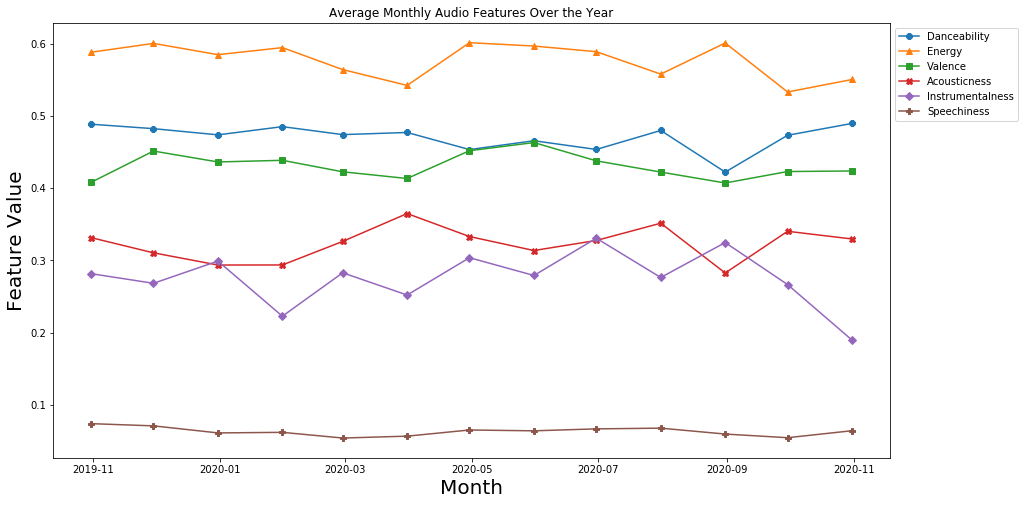

In [24]:
plt.figure(figsize=(15,8))
plt.plot(monthly_danceability,marker="8")
plt.plot(monthly_energy,marker="^")
plt.plot(monthly_valence,marker="s")
plt.plot(monthly_acousticness,marker="X")
plt.plot(monthly_instrumentalness,marker="D")
plt.plot(monthly_speechiness,marker="P")
plt.legend(["Danceability","Energy","Valence","Acousticness","Instrumentalness","Speechiness"]
           ,loc='upper left',bbox_to_anchor=(1, 1))
plt.title("Average Monthly Audio Features Over the Year")
plt.xlabel("Month",fontsize=20)
plt.ylabel("Feature Value",fontsize=20)

The plot above shows how the audio features for the music I have listened to over the past year have changed. The values are the average for the month. Most features are actually relatively consistent throughout the year. The most consistent is speechiness. This is most likely because the proportion of rap in my listening history doesn't change much. Although I used to listen to Hip-Hop a lot, in the past year there hasn't been any period where I've consistenly listened to it, only the occasional album or track. Therefore, it probably gets lost in the rest of my listening, which has very low speechiness. The valence of my listening history seems to increase just after lockdown starts, maybe suggesting I needed some happier music to cheer me up :). Other than this, it's difficult to spot any significant changes in these audio properties that I could relate to anything in real life or attribute to a change in the music I'm listening to. It's possible that due to the high volume of music I listen to combined with the variety that I'll listen to over a month, that the variances in these values can get lost easily and that's why they're relatively consistent over a year. It would be interesting to compare these values to someone else's data and see how they differ. One interesting thing I noticed is that for the months of 2020-08 and 2020-09, the increases and decreases of the audio properties seem to be linked. In 2020-08, the instrumentalness and energy drop, while the danceability and acousticness increase. The opposite then happens in 2020-09. This may be the effect of listening to a certain type of music more than normal which has quite extreme audio properties. For example, post-rock like Swans or GY!BE tends to be very instrumental, not danceable at all, not acoustic and often high energy. From checking my listening history in these months, I did listen to Swans quite a lot so this may be an explanation.